## Content Based recommendation system

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv("D:/Courses/big data/project/Anime/anime.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


#### Exploring the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12294 non-null int64
name        12294 non-null object
genre       12232 non-null object
type        12269 non-null object
episodes    12294 non-null object
rating      12064 non-null float64
members     12294 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 672.4+ KB


In [4]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

#### For Cotent based recommender system we will be using { Name, Genre, Type} column

In [5]:
# preprocessing
# filling NaN "Type" with unknown
df.loc[(df['type'].isnull()), 'type'] = 'Unknown'
# filling NaN "Genre" with unknown
df.loc[(df['genre'].isnull()), 'genre'] = 'Unknown'

In [6]:
df.isnull().sum()

anime_id      0
name          0
genre         0
type          0
episodes      0
rating      230
members       0
dtype: int64

In [7]:
# Removing punctuation
#df['name'] = df['name'].str.replace('[^\w\s]','')
#df['name'].head()

In [8]:
# Dropping unwanted columns
df.drop(['rating', 'members', 'episodes'], axis=1, inplace=True)
df.head()

,anime_id,name,genre,type
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV


In [9]:
# Converting to lower case
df['genre'] = df['genre'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
# tokenization of keywords
#from textblob import TextBlob
#df['genre'] = df['genre'].apply(lambda x: TextBlob(x).words)
#df['type'] = df['type'].apply(lambda x: TextBlob(x).words)
#df['episodes'] = df['episodes'].apply(lambda x: TextBlob(x).words)
#df.head()

In [11]:
df['bag_of_words'] = ""
df.loc[:,'bag_of_words'] = df.loc[:, 'genre'] +', '+ df.loc[:, 'type']

In [12]:
# Data after preprocessing
df.head()

,anime_id,name,genre,type,bag_of_words
0,32281,Kimi no Na wa.,"drama, romance, school, supernatural",Movie,"drama, romance, school, supernatural, Movie"
1,5114,Fullmetal Alchemist: Brotherhood,"action, adventure, drama, fantasy, magic, mili...",TV,"action, adventure, drama, fantasy, magic, mili..."
2,28977,Gintama°,"action, comedy, historical, parody, samurai, s...",TV,"action, comedy, historical, parody, samurai, s..."
3,9253,Steins;Gate,"sci-fi, thriller",TV,"sci-fi, thriller, TV"
4,9969,Gintama&#039;,"action, comedy, historical, parody, samurai, s...",TV,"action, comedy, historical, parody, samurai, s..."


### Using sklearn TFIDF implementation

In [13]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df["bag_of_words"])

In [14]:
bag = vectorizer.get_feature_names()

In [15]:
# Using Cosine to obtain similaritier between two animes
cosine_sim = cosine_similarity(tfidf, tfidf)

In [16]:
cosine_sim.shape

(12294, 12294)

In [17]:
# recommender function
def recommendation(name, cosine_sim):
    recommended = np.array([])
    index_ = df.loc[(df['name'] == name)].index
    score = cosine_sim[index_]
    ind = np.argpartition(score[0], -10)[-11:]
    ind = ind[np.argsort(score[0][ind])]
    print(score[0][ind])
    #for i in ind:
     #   recommended = np.append(recommended, df.loc[(df.index == i)]['name'])        
    return ind

In [18]:
# Predicting movies similar to "Fairy Tail"
indices = recommendation('Fairy Tail', cosine_sim)
print(indices)
df[['anime_id','name', 'genre', 'type']].loc[indices]

[0.9394034  0.9394034  0.9394034  0.9394034  0.96155633 0.96155633
 0.96155633 0.96155633 0.96155633 1.         1.        ]
[ 1854   959  3592  2524 10953   290   101   268   795   255   288]


,anime_id,name,genre,type
1854,332,Dokidoki Densetsu: Mahoujin Guru Guru,"adventure, comedy, fantasy, magic, shounen",TV
959,331,Mahoujin Guru Guru,"adventure, comedy, fantasy, magic, shounen",TV
3592,1018,Majutsushi Orphen: Revenge,"adventure, comedy, fantasy, magic, shounen",TV
2524,1164,Mahou Senshi Louie,"adventure, comedy, fantasy, magic, shounen",TV
10953,28833,Chain Chronicle: Haecceitas no Hikari,"action, adventure, fantasy, magic, shounen",TV
290,31741,Magi: Sinbad no Bouken (TV),"action, adventure, fantasy, magic, shounen",TV
101,18115,Magi: The Kingdom of Magic,"action, adventure, fantasy, magic, shounen",TV
268,14513,Magi: The Labyrinth of Magic,"action, adventure, fantasy, magic, shounen",TV
795,8086,Densetsu no Yuusha no Densetsu,"action, adventure, fantasy, magic, shounen",TV
255,22043,Fairy Tail (2014),"action, adventure, comedy, fantasy, magic, sho...",TV


## TF - IDF implementation without library

In [19]:
# Calculating TF
tf = df['bag_of_words'].apply(lambda x: pd.value_counts(x.split(","))).sum(axis = 0).reset_index()
tf.columns = ['words','tf']

# removing duplicate words
for i,word1 in enumerate(tf['words']):
    tf.loc[i, 'words']= word1.strip()
tf2 = {}
for i,word1 in enumerate(tf['words']):
    if word1 not in tf2.keys():
        tf2[word1] = tf.loc[i, 'tf']
    else:
        tf2[word1] += tf.loc[i, 'tf']
tf = pd.DataFrame.from_dict(tf2, orient='index').reset_index()
tf.columns = ['words','tf']
tf.head()

,words,tf
0,school,1220.0
1,Movie,2348.0
2,drama,2016.0
3,supernatural,1037.0
4,romance,1464.0


In [20]:
# Calculating IDF
N = df.shape[0]
idf = {}
for i,word in enumerate(tf['words']):
    tf.loc[i, 'idf'] = np.log(N/(len(df[df['bag_of_words'].str.contains(word)])))
    idf[word] = np.log(N/(len(df[df['bag_of_words'].str.contains(word)])))


In [21]:
# Creating tfidf vectors
tff = pd.DataFrame(columns=tf['words'])
for i in range(N):
    dict_ = dict.fromkeys(tf['words'], 0)
    for word in df['bag_of_words'][i].split(", "):
        dict_[word] = (1/len(df['bag_of_words'][i].split(", "))) * idf[word]
    tff = tff.append(dict_, ignore_index=True)
tff.head()

words,school,Movie,drama,supernatural,romance,adventure,TV,military,action,magic,...,Music,cars,ONA,kids,shoujo ai,unknown,Unknown,hentai,yaoi,yuri
0,0.462052,0.331109,0.361599,0.494556,0.425588,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.225999,0.000000,0.000000,0.206943,0.147192,0.420303,0.182944,0.345018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147192,0.000000,0.182944,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.392512,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147192,0.000000,0.182944,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
cosine_sim_ = cosine_similarity(tff, tff)

### Comparing both with and without library tfidf implementation and recommending on the basis of contents

In [23]:
# Predicting movies similar to "Fairy Tail"
indices = recommendation('Fairy Tail', cosine_sim_)
print(indices)
df[['anime_id','name', 'genre', 'type']].loc[indices]

[0.94857288 0.94857288 0.94857288 0.94857288 0.97758854 0.97758854
 0.97758854 0.97758854 0.97758854 1.         1.        ]
[ 2524  1854  3592   959   101   268   795 10953   290   288   255]


,anime_id,name,genre,type
2524,1164,Mahou Senshi Louie,"adventure, comedy, fantasy, magic, shounen",TV
1854,332,Dokidoki Densetsu: Mahoujin Guru Guru,"adventure, comedy, fantasy, magic, shounen",TV
3592,1018,Majutsushi Orphen: Revenge,"adventure, comedy, fantasy, magic, shounen",TV
959,331,Mahoujin Guru Guru,"adventure, comedy, fantasy, magic, shounen",TV
101,18115,Magi: The Kingdom of Magic,"action, adventure, fantasy, magic, shounen",TV
268,14513,Magi: The Labyrinth of Magic,"action, adventure, fantasy, magic, shounen",TV
795,8086,Densetsu no Yuusha no Densetsu,"action, adventure, fantasy, magic, shounen",TV
10953,28833,Chain Chronicle: Haecceitas no Hikari,"action, adventure, fantasy, magic, shounen",TV
290,31741,Magi: Sinbad no Bouken (TV),"action, adventure, fantasy, magic, shounen",TV
288,6702,Fairy Tail,"action, adventure, comedy, fantasy, magic, sho...",TV


## Creating user profile and recommending movies 

In [24]:
user_ratings = pd.read_csv("D:/Courses/big data/project/Anime/rating.csv")

In [25]:
user_ratings.groupby(user_ratings["rating"]).count()

,user_id,anime_id
rating,,
-1,1476496,1476496
1,16649,16649
2,23150,23150
3,41453,41453
4,104291,104291
5,282806,282806
6,637775,637775
7,1375287,1375287
8,1646019,1646019


In [26]:
# dropping missing ratings
user_ratings.drop(user_ratings[user_ratings['rating']==-1].index, axis=0, inplace=True)
user_ratings.groupby(user_ratings["rating"]).count()

,user_id,anime_id
rating,,
1,16649,16649
2,23150,23150
3,41453,41453
4,104291,104291
5,282806,282806
6,637775,637775
7,1375287,1375287
8,1646019,1646019
9,1254096,1254096


In [27]:
# Data generation
import random
def get_test_data():
    # random.seed(123)
    #user = random.randint(1, max(user_ratings['user_id']))    
    #print("User selected for predictions UserId:", (user))
    # generated in Collaborative filtering for comparing the results
    test_data_users = [36112, 23604, 26867, 30558, 55900, 21256, 40027, 67337, 69934, 61587, 18357, 16907, 57904, 69741, 14220, 37539, 53879, 45611, 50095, 53348, 36318, 8157, 29255, 67689, 57239, 7740, 12496, 27932, 60977, 36703, 8520, 62520, 46291, 41439, 27950, 71103, 70437, 27763, 64931, 49575, 12316, 14039, 13887, 11891, 1133, 58817, 58038, 23077, 6422, 36364]
    test_data_animes = pd.read_csv("D:/Courses/big data/project/BigDataProject/data/test_data_animes.csv")
    return test_data_users, test_data_animes['test_animes'].to_list()

In [28]:
training_data = user_ratings.copy(deep=True)

In [68]:
data = training_data.loc[training_data['user_id']==user]
    
# shifting the rating with center at zero
mean = data.mean()['rating']
#data['likeness'] = 0
data = data.assign(likeness=0)
data.loc[:, "likeness"] = data.loc[:, "rating"] - mean

# creating user table for all the movies rated by him/her
#user_prof = pd.DataFrame(columns=bag)
user_prof = pd.DataFrame(columns=tf['words'])
for id in data['anime_id']:
    dict_ = dict.fromkeys(tf['words'], 0)
    for word in df.loc[df['anime_id']==id]['bag_of_words'].values[0].split(', '):
        #if word in tf['words']:
            #dict_[word] = tf.loc[(tf.words == word)]['tfidf'][tf.loc[(tf.words == word), 'tfidf'].index[0]]
        dict_[word] = (1/len(df.loc[df['anime_id']==id]['bag_of_words'].values[0].split(', '))) * idf[word]
    #print(dict_)    
    user_prof = user_prof.append(dict_, ignore_index=True)
# Creating user prfile by doing weighted sum of the attributes he/she has rated
user_profile = []
for col in user_prof.columns:
    user_profile.append(user_prof[col] @ data['likeness'].values)
user_profile    

[-0.09289936320646325,
 0.0,
 0.9757438666884701,
 -0.31400373450634067,
 0.9389952707601639,
 0.26278530738396266,
 0.2703974287149612,
 0.0,
 -0.10531352637211089,
 -0.3650978959376411,
 -0.6858629391126686,
 0.12387383763795945,
 0.0,
 -0.5190062618972052,
 0.7635268848032309,
 -0.8418389226100651,
 0.20805358008067795,
 -1.650319499604124,
 0.0,
 0.831702656985294,
 0.0,
 0.0,
 0.2566956088599612,
 0.24445147155442398,
 0.0,
 -1.0707696182994215,
 -0.296420744289998,
 0.0,
 0.0,
 0.0,
 -1.3277148713042386,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.8144182117382499,
 0.0,
 0.0,
 0.46870773180012504,
 0.0,
 -0.6580465856193073,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [70]:
data

,user_id,anime_id,rating,likeness
1149,8,269,9,0.666667
1150,8,355,9,0.666667
1151,8,6702,10,1.666667
1152,8,7088,5,-3.333333
1153,8,7593,9,0.666667
1154,8,8630,8,-0.333333
1155,8,10620,6,-2.333333
1156,8,10793,10,1.666667
1157,8,11241,7,-1.333333
1158,8,11757,9,0.666667


Text(0, 0.5, 'Frequency')

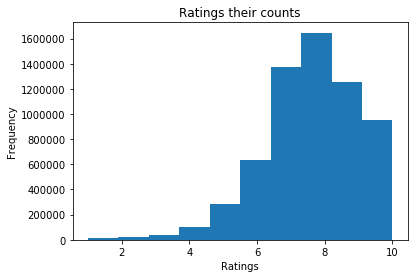

In [30]:
# create figure and axis
fig, ax = plt.subplots()
ax.hist(user_ratings['rating'])
ax.set_title('Ratings their counts')
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency')

In [31]:
def create_user_profile(user):
    data = training_data.loc[training_data['user_id']==user]
    
    # shifting the rating with center at zero
    mean = data.mean()['rating']
    #data['likeness'] = 0
    data = data.assign(likeness=0)
    data.loc[:, "likeness"] = data.loc[:, "rating"] - mean
    
    # creating user table for all the movies rated by him/her
    #user_prof = pd.DataFrame(columns=bag)
    user_prof = pd.DataFrame(columns=tf['words'])
    for id in data['anime_id']:
        dict_ = dict.fromkeys(tf['words'], 0)
        for word in df.loc[df['anime_id']==id]['bag_of_words'].values[0].split(', '):
            #if word in tf['words']:
                #dict_[word] = tf.loc[(tf.words == word)]['tfidf'][tf.loc[(tf.words == word), 'tfidf'].index[0]]
            dict_[word] = (1/len(df.loc[df['anime_id']==id]['bag_of_words'].values[0].split(', '))) * idf[word]
        #print(dict_)    
        user_prof = user_prof.append(dict_, ignore_index=True)
    # Creating user prfile by doing weighted sum of the attributes he/she has rated
    user_profile = []
    for col in user_prof.columns:
        user_profile.append(user_prof[col] @ data['likeness'].values)
    return user_profile, data

In [32]:
def evaluation_metrics(cosine_sim_, data):
    predicted_likeness = {}
    for x in data["anime_id"]:
        predicted_likeness[x] = cosine_sim_[0][df.loc[df['anime_id']==x].index[0]]
    true_pos = 0
    true_neg = 0
    false_pos = 0
    false_neg = 0
    precision = 0
    recall = 0
    accuracy = 0
    for x in predicted_likeness.keys():
        predic = predicted_likeness[x]
        actual = data.loc[data["anime_id"]==x, 'likeness'].values[0]
        if predic >= 0 and actual >= 0:
            true_pos += 1
        elif predic >= 0 and actual < 0:
            false_pos += 1
        elif predic < 0 and actual >= 0:
            false_neg += 1
        else:
            true_neg += 1
    print("true_pos : "+ str(true_pos) +"\ntrue_neg : "+str(true_neg)+"\nfalse_pos : "+ str(false_pos) +"\nfalse_neg : "+ str(false_neg) +"\n")
    if (true_pos + false_pos) != 0:
        precision = true_pos/(true_pos + false_pos)
    if (true_pos + false_neg) != 0:
        recall = true_pos/(true_pos + false_neg)
    accuracy = (true_pos + true_neg)/(true_pos + false_neg + true_neg + false_pos)
    print("Precision : "+str(precision*100) + "\nRecall : "+str(recall*100)+"\nAccuracy : "+str(accuracy*100))
    return accuracy

In [33]:
# recommender function
def recommendation_with_user_profile(user):
    cosine_sim_user = cosine_similarity(user, tff)
    ind = np.argpartition(cosine_sim_user[0], -10)[-10:]
    ind = ind[np.argsort(cosine_sim_user[0][ind])]    
    return ind, cosine_sim_user

In [34]:
def grad_descent(user, user_p):
    # creating user vector from user dictionary
    user_prof = []    
    for u in user_p.keys():
        user_prof.append(user_p[u])
    user_prof = np.asarray(user_prof)
    user_prof = user_prof.reshape(-1, 51)
    print(user_prof)
    cosine_sim_user = cosine_similarity(user_prof, tff)
    data = training_data.loc[training_data['user_id']==user]
    mean = data.mean()['rating']
    data = data.assign(likeness=0)
    data.loc[:, "likeness"] = data.loc[:, "rating"] - mean
    predicted_likeness = {}
    for x in data["anime_id"]:
        predicted_likeness[x] = cosine_sim_user[0][df.loc[df['anime_id']==x].index[0]]
        
    for x in predicted_likeness.keys():
        predic = predicted_likeness[x]
        actual = data.loc[data["anime_id"]==x, 'likeness'].values[0]
        if predic >= 0 and actual < 0:
            for word in df.loc[df['anime_id']==x]['bag_of_words'].values[0].split(', '):
                tfidf_score = (1/len(df.loc[df['anime_id']==x]['bag_of_words'].values[0].split(', '))) * idf[word]
                user_p[word] -= 0.001*tfidf_score
        elif predic < 0 and actual >= 0:
            for word in df.loc[df['anime_id']==x]['bag_of_words'].values[0].split(', '):
                tfidf_score = (1/len(df.loc[df['anime_id']==x]['bag_of_words'].values[0].split(', '))) * idf[word]
                user_p[word] += 0.001*tfidf_score
    return user_p

In [35]:
def grad_descent2(user, user_p, anime, data):
    # creating user vector from user dictionary
    user_prof = []    
    for u in user_p.keys():
        user_prof.append(user_p[u])
    user_prof = np.asarray(user_prof)
    user_prof = user_prof.reshape(-1, 51)
    print(user_prof)
    cosine_sim_user = cosine_similarity(user_prof, tff)
    predic = cosine_sim_user[0][df.loc[df['anime_id']==anime].index[0]]
    actual = data.loc[data["anime_id"]==anime, 'likeness'].values[0]
    if predic >= 0 and actual < 0:
        for word in df.loc[df['anime_id']==anime]['bag_of_words'].values[0].split(', '):
            tfidf_score = (1/len(df.loc[df['anime_id']==anime]['bag_of_words'].values[0].split(', '))) * idf[word]
            user_p[word] -= 0.01*tfidf_score
    elif predic < 0 and actual >= 0:
        for word in df.loc[df['anime_id']==anime]['bag_of_words'].values[0].split(', '):
            tfidf_score = (1/len(df.loc[df['anime_id']==anime]['bag_of_words'].values[0].split(', '))) * idf[word]
            user_p[word] += 0.01*tfidf_score
    return user_p

In [47]:
training_data.loc[training_data['user_id']==8]

,user_id,anime_id,rating
1149,8,269,9
1150,8,355,9
1151,8,6702,10
1152,8,7088,5
1153,8,7593,9
1154,8,8630,8
1155,8,10620,6
1156,8,10793,10
1157,8,11241,7
1158,8,11757,9


In [48]:
#Gradient descent2
#user = 59325
user = 8
epoch = 0
# initializing user profile
user_p = dict.fromkeys(tf['words'], 0)
accuracy = 0
data = training_data.loc[training_data['user_id']==user]
mean = data.mean()['rating']
data = data.assign(likeness=0)
data.loc[:, "likeness"] = data.loc[:, "rating"] - mean
while epoch != 2 and accuracy < 0.8:
    for anime in data["anime_id"]:
        user_p = grad_descent2(user, user_p, anime, data)
        user_prof = [] 
        for u in user_p.keys():#sorted(user_p.keys()):
            user_prof.append(user_p[u])
        user_prof = np.asarray(user_prof)
        user_prof = user_prof.reshape(-1, 51)
        cosine_sim_user = cosine_similarity(user_prof, tff)
        accuracy = evaluation_metrics(cosine_sim_user, data)  
    epoch += 1
    print("--------------------------epoch : " + str(epoch))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
true_pos : 8
true_neg : 0
false_pos : 4
false_neg : 0

Precision : 66.66666666666666
Recall : 100.0
Accuracy : 66.66666666666666
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
true_pos : 8
true_neg : 0
false_pos : 4
false_neg : 0

Precision : 66.66666666666666
Recall : 100.0
Accuracy : 66.66666666666666
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
true_pos : 8
true_neg : 0
false_pos : 4
false_neg : 0

Precision : 66.66666666666666
Recall : 100.0
Accuracy : 66.66666666666666
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
true_pos : 0
true_neg : 4
false_pos : 0
false_neg : 8

Precision : 0
Recall : 0.0
Accuracy : 33.33333333333333
[[-0.00256696  0.          0.          0.          0.          0.
  -0

In [132]:
#Gradient descent
user = 59325
epoch = 0
# initializing user profile
user_p = dict.fromkeys(tf['words'], 0)
accuracy = 0
while epoch != 30 and accuracy < 0.8:    
    user_p = grad_descent(user, user_p)
    #print(user_p)
    epoch += 1
    print("epoch : " + str(epoch))
    user_prof = [] 
    for u in user_p.keys():#sorted(user_p.keys()):
        user_prof.append(user_p[u])
    user_prof = np.asarray(user_prof)
    user_prof = user_prof.reshape(-1, 51)
    cosine_sim_user = cosine_similarity(user_prof, tff)
    data = training_data.loc[training_data['user_id']==user]
    mean = data.mean()['rating']
    data = data.assign(likeness=0)
    data.loc[:, "likeness"] = data.loc[:, "rating"] - mean
    accuracy = evaluation_metrics(cosine_sim_user, data)  

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
epoch : 1
true_pos : 0
true_neg : 210
false_pos : 0
false_neg : 464

Precision : 0
Recall : 0.0
Accuracy : 31.15727002967359
[[-0.03229163 -0.02568523 -0.02055956 -0.00871725 -0.01734888 -0.03138052
  -0.02464696 -0.00906882 -0.01637584 -0.00879981 -0.01025066 -0.01145469
  -0.00290422 -0.01683365 -0.00333228 -0.01838304 -0.00360493 -0.00483308
  -0.00571956 -0.01027413 -0.00454937 -0.00518185 -0.01126802 -0.01040548
  -0.00270743 -0.00819904 -0.01355642 -0.00509486 -0.00133108 -0.0082907
  -0.00151568 -0.01323605 -0.00451906 -0.00997141 -0.00433045 -0.01982688
  -0.00186099  0.         -0.00210918  0.         -0.02149648  0.
  -0.0008567  -0.00073154 -0.00067783 -0.00658804  0.          0.
   0.          0.          0.        ]]
epoch : 2
true_pos : 464
true_neg : 0
false_pos : 210
false_neg : 0

Precision : 68.84272997032642
Recall : 100.0
Accuracy : 68.84272997032642
[[ 0.0346

epoch : 12
true_pos : 464
true_neg : 1
false_pos : 209
false_neg : 0

Precision : 68.94502228826151
Recall : 100.0
Accuracy : 68.99109792284867
[[ 0.03505104  0.01507237  0.0243859   0.00350096  0.02024245  0.03084493
   0.00986887  0.03812814  0.00937432 -0.00074684  0.00131345  0.01925663
   0.01139795  0.00939492 -0.00781156  0.02368131  0.01014441  0.01234203
  -0.01640844  0.01764686 -0.00732863  0.00782379  0.02885167  0.01249554
   0.00668678  0.01824897  0.00911404 -0.0078174   0.0126738   0.00368967
   0.00935979 -0.0047861   0.00892277 -0.00367859 -0.00069292 -0.01251965
   0.00205484  0.00349499  0.01160052  0.00890337  0.00929258  0.00658754
   0.         -0.00365768 -0.00338916 -0.00382531  0.          0.
   0.          0.          0.        ]]
epoch : 13
true_pos : 238
true_neg : 162
false_pos : 48
false_neg : 226

Precision : 83.21678321678321
Recall : 51.293103448275865
Accuracy : 59.34718100890207
[[ 0.00275941 -0.01061286  0.00382634 -0.00521629  0.00289356 -0.0005355

epoch : 22
true_pos : 464
true_neg : 0
false_pos : 210
false_neg : 0

Precision : 68.84272997032642
Recall : 100.0
Accuracy : 68.84272997032642
[[ 0.04176019  0.02062874  0.0326248   0.00271917  0.02440326  0.03677854
   0.01319897  0.04104241  0.01349352 -0.00044202  0.00120272  0.02294316
   0.01363051  0.01472052 -0.00818688  0.03220706  0.01217718  0.01101588
  -0.02324962  0.02056349 -0.01002517  0.00800704  0.02834928  0.017518
   0.00951243  0.02028089  0.01284703 -0.0086366   0.01253308  0.00412787
   0.01229765 -0.00398473  0.00942288 -0.00375767 -0.00106706 -0.0042868
   0.00580266  0.00611623  0.01265511  0.01478897  0.02341322  0.0077975
   0.0017134  -0.00877843 -0.00542266 -0.00769571  0.          0.
   0.          0.          0.        ]]
epoch : 23
true_pos : 360
true_neg : 98
false_pos : 112
false_neg : 104

Precision : 76.27118644067797
Recall : 77.58620689655173
Accuracy : 67.95252225519289
[[ 0.00946856 -0.00505649  0.01206524 -0.00599807  0.00705438  0.00539802
  -

In [68]:
#for user in test_user:
user = 8
user_profile, data = create_user_profile(user)
# Reshaping the array
user_prof = np.asarray(user_profile)
user_prof = user_prof.reshape(-1, 51)
index, cosine_sim_user = recommendation_with_user_profile(user_prof)
print(cosine_sim_user)
#print("Recommending movies for user "+ str(user))
#df[['anime_id', 'name', 'genre', 'type']].loc[index]

[[ 0.12130752 -0.11739642  0.17498252 ...  0.01265109  0.01265109
   0.00248652]]


In [69]:
evaluation_metrics(cosine_sim_user, data)

true_pos : 247
true_neg : 145
false_pos : 65
false_neg : 217

Precision : 79.16666666666666
Recall : 53.23275862068966
Accuracy : 58.160237388724035


In [51]:
ind,_ = recommendation_with_user_profile(user_prof)
df[['anime_id', 'name', 'genre', 'type']].loc[ind]

,anime_id,name,genre,type
3473,30039,Future Card Buddyfight 100,game,TV
10603,20087,Treasure Gaust,game,TV
10766,9822,Xiang Qi Master,game,TV
5650,32785,Future Card Buddyfight DDD,game,TV
3950,21835,Majin Bone,game,TV
2745,19067,Future Card Buddyfight,game,TV
7851,33690,Nazotokine,game,TV
2971,5298,Yu☆Gi☆Oh! 5D&#039;s: Shinkasuru Kettou! Stardu...,"fantasy, game, sci-fi",Special
4629,20533,Z/X: Ignition,"adventure, fantasy, game, sci-fi",TV
3157,873,.hack//Roots,"adventure, drama, fantasy, game, sci-fi",TV


In [66]:
df.loc[df.anime_id == training_data.loc[training_data['user_id']==8]['anime_id'].values[9]]

,anime_id,name,genre,type,bag_of_words
804,11757,Sword Art Online,"action, adventure, fantasy, game, romance",TV,"action, adventure, fantasy, game, romance, TV"
